# Define goals
- Objective: Identify instances of fraud and misrepresentation from the supplied data sets. Identify suspicious patterns. Describe how the data can be used to prevent fraud.
- Business need: Fraud reduces the business revenue/profit. Data cleaning and aggregation is required to quickly parse data and identify likely cases of fraud. Identification allows prevention, while visualisation and aggregation of instances allows forcasting and measurement to determine how preventative measures are performing/if new methods of identification are required.
- Audience: A mix of technical and non-technical. Ideas and methodology explanations should cater to both.

# Load and explore the data
No need to gather data as this is provided. Data can be loaded in to dataframes and initially explored to determine best process.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

quotes = pd.read_csv('quotes_final_dataset.csv')
print(quotes.info())
display(quotes.head())

sales = pd.read_csv('sales_final_dataset.csv')
print(sales.info())
display(sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12042 entries, 0 to 12041
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quote_id       12037 non-null  object 
 1   registration   12033 non-null  object 
 2   premium        12042 non-null  float64
 3   purchase_date  12042 non-null  object 
 4   quote_date     12041 non-null  object 
 5   postcode       12042 non-null  object 
 6   forename       12042 non-null  object 
 7   surname        12041 non-null  object 
 8   email          12042 non-null  object 
 9   convictions    12042 non-null  int64  
 10  claims         12042 non-null  int64  
 11  mileage        12041 non-null  float64
 12  owned_years    12042 non-null  int64  
 13  ncb            12042 non-null  int64  
 14  age            12042 non-null  int64  
 15  licence_years  12042 non-null  int64  
 16  value          12041 non-null  float64
 17  occupation     12026 non-null  object 
dtypes: flo

,quote_id,registration,premium,purchase_date,quote_date,postcode,forename,surname,email,convictions,claims,mileage,owned_years,ncb,age,licence_years,value,occupation
0,0001d49d-204d-4fef-8de3-0907db8ea68e,RO54BZG,4869.34,01/01/2025,28/12/2024,LW0 9IU,Christopher,Ryan,christopher.black951@gmail.com,0,0,18000.0,14,5,70,17,31974.0,Retired
1,0002747c-9b6d-4689-b634-18951990da2f,XS67ZIX,2561.47,01/01/2025,26/12/2024,CL1 2FY,Alec,Lopez,edward.lopez612@gmail.com,0,0,9000.0,10,8,62,6,30000.0,Student
2,000843c5-c972-4fac-a2e0-dc1a02b98ecf,EU34IZV,1897.99,01/01/2025,06/12/2024,YR0 3YI,Janet,Newman,janet.newman188@gmail.com,0,0,1000.0,1,8,40,19,50000.0,Employed
3,00139dff-197b-465d-83d6-3a7fd0c703f1,PM26NIL,1282.04,01/01/2025,21/12/2024,SV6 9ZV,Cory,Campos,cory.campos430@gmail.com,1,2,9000.0,5,3,68,19,24000.0,Student
4,0013d207-d534-4273-b053-fc241f0408fd,LO74SLF,1195.05,01/01/2025,01/12/2024,EF2 4WW,Adam,Brewer,adam.brewer914@gmail.com,0,0,19000.0,9,8,54,7,40623.0,Unemployed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   quote_id       997 non-null    object 
 2   registration   997 non-null    object 
 3   premium        1000 non-null   float64
 4   purchase_date  1000 non-null   object 
 5   quote_date     1000 non-null   object 
 6   postcode       1000 non-null   object 
 7   forename       998 non-null    object 
 8   surname        998 non-null    object 
 9   email          998 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB
None


,Unnamed: 0,quote_id,registration,premium,purchase_date,quote_date,postcode,forename,surname,email
0,0,bb597375-8583-4f25-860d-262c47db9210,SP89FLB,566.50,01/01/2025,11/12/2024,TZ0 6NM,Laura,Miller,laura.miller302@gmail.com
1,1,f95f89b2-c90c-4a51-80c6-ede7f3c06938,VP30BDW,3643.48,01/01/2025,06/12/2024,XZ1 6SS,Laura,Garcia,laura.garcia905@gmail.com
2,2,6eeeaf9d-b1e2-4439-861c-f5a773de66db,NQ35KZQ,1717.61,01/01/2025,30/12/2024,US9 3VY,Joshua,Williams,joshua.williams516@gmail.com
3,3,8732ef48-1820-4995-9d3e-d5ee48378667,UF30ZSS,1389.27,01/01/2025,23/12/2024,FH5 5YE,Glenn,Baker,glenn.baker366@gmail.com
4,4,3dbd7bf6-8178-45f1-9ec9-a6e6a002b6c8,NV87GHN,1426.12,01/01/2025,30/12/2024,SG0 7EE,Jonathan,Lee,jonathan.lee437@gmail.com


# Understand columns and structure
In the quotes dataset we have:
- quote_id - Unique identifier for each quote made (assumption that this is unique)
- registration - Registration of the vehicle for which the quote is refering to
- premium - Cost of the quote
- purchase_date - Date when the quote starts (assumption that this is the same for all entries)
- quote_date - Date the quote was generated
- postcode - Postcode associated with the insuree
- forename - First name of insuree
- surname - Last name of insuree
- email - Email used when generating the quote
- convictions - Driving convictions such as speeding
- claims - How many previous insurance claims the insuree has
- mileage - Mileage of the vehicle
- owned_years - Years vehicle has been owned (assumption that this is not the total age of vehicle)
- ncb - No claims bonus number of years
- age - Age of insuree
- licence_years - Number of years insuree has held a driving licence
- value - Value of vehicle
- occupation - Occupation of insuree
In the sales dataset we have:
- Unnamed: 0 - index column
- Columns 2-10 are the same as for quotes

# Thoughts on the datasets
The quotes dataset contains many quotes for each vehicle, while the sales dataset contains just the single purchased quote. To match the sales quote to the multiple calculated quotes for each vehicle the registration is the best suited column. Matching quote_id would either lose all of the extra quotes from the quotes dataset or keep vehicles and insurees that did not make a sale. Other columns such as name columns, email and postcode  can be used to verify that the match is correct.
Some values are missing, registration in the sales dataset is missing 3 values. These rows could either be dropped or the data filled. In this case the data can be filled in from the quotes dataset.

### Assumptions
- Quote ids are unique.
- All sales quotes exist in the quotes dataset.
- Different registrations pertain to different groups of quotes.

### Next steps
- Check if purchase_date has any different values, if not drop from both datasets.
- Drop index column for sales dataset.
- Confirm quote ids are unique and that sales quotes exist in quotes dataset.
- Add in registration missing values to sales dataset.
- Merge sales and quotes datasets on registration.

In [2]:
#check purchase date unique values
print(sales['purchase_date'].unique())
print(quotes['purchase_date'].unique())

['01/01/2025']
['01/01/2025']


In [3]:
#drop purchase date and unnamed column
sales.drop('purchase_date',axis=1,inplace=True)
sales.drop('Unnamed: 0',axis=1, inplace=True)
quotes.drop('purchase_date',axis=1,inplace=True)

In [4]:
#Check that quotes are unique in both datasets
print(sales['quote_id'].nunique())
print(quotes['quote_id'].nunique())

997
12037


These values equal the number of non-null entries for each dataset's quote_id column.

In [5]:
#Check the number of unique registrations in the sales dataset and how many of them exist in the quotes dataset
print(sales['registration'].nunique())
print(len(sales[sales['registration'].isin(quotes['registration'])]))

997
1000


The above values show that all of the non-null registrations are unique, and all appear in the quotes dataset. The second number is 1000 as the null values also match with null entries in the quotes dataset


In [6]:
#Return a subset of rows from the sales dataset that have null registrations
no_reg_sales = sales[sales['registration'].isna()]
display(no_reg_sales)

#I will be using the quote id to fill in the registration
#I need to check that the missing registration rows have quote ids in the quotes dataset
print(len(no_reg_sales[no_reg_sales['quote_id'].isin(quotes['quote_id'])]))


,quote_id,registration,premium,quote_date,postcode,forename,surname,email
588,6739daa9-17bb-4500-801d-ebae383a5eed,NaN,537.87,30/12/2024,EY7 5AR,Katelyn,Smith,katelyn.smith257@gmail.com
706,a5646e15-06ed-4174-9ce3-51998b05c9c4,NaN,1575.31,08/12/2024,DW5 5WN,Linda,King,linda.king226@gmail.com
707,9ca35603-118c-4074-9016-5af9dde01bf1,NaN,4026.61,01/12/2024,MM6 1RI,Patricia,Johnson,patricia.johnson163@gmail.com


3


The value of three shows that all three rows match quote ids in the quotes dataset. I can now filter the quotes dataset to these rows and merge with sales to get a column of registrations from quotes dataset, populated only where sales has no registration. I will use a left join on the sales dataset to keep all of the sales rows and only add rows from the filtered quotes dataset that match the quote id.

In [7]:
#Filter the quotes dataset to just the quotes from sales with no registration
quote_reg = quotes[quotes['quote_id'].isin(no_reg_sales['quote_id'])]

#Merge sales with filtered quotes dataset
sales_updated = pd.merge(left=sales, right=quote_reg[['quote_id','registration']],
                          on='quote_id', how='left',suffixes=('','_y') )

#Display merged table
display(sales_updated.sort_values(by='registration'))

,quote_id,registration,premium,quote_date,postcode,forename,surname,email,registration_y
866,00c42e10-3bd9-4511-9aff-67d498cb927c,AA84OXW,3513.09,18/12/2024,AR1 9IS,Heather,Cole,heather.cole618@gmail.com,NaN
90,b1d39b0e-9090-41c3-9eda-241cf5ad5c3f,AB21QEV,1928.03,30/12/2024,BG5 1DR,Julie,Ford,julie.ford298@gmail.com,NaN
388,867fbd01-c02e-4917-980e-36bcca428504,AB22HXY,2648.16,23/12/2024,YG7 4ML,Monique,Hunter,monique.hunter181@gmail.com,NaN
829,ea74dda6-9d78-4ede-a41b-78bb165864ab,AE26MCE,3504.35,15/12/2024,HU3 8DC,John,Tucker,john.tucker719@gmail.com,NaN
531,d81fba4c-64d7-4077-b11a-49b76bb5bd79,AE44NHP,4892.09,23/12/2024,BK0 3HK,Lauren,Henderson,lauren.henderson629@gmail.com,NaN
...,...,...,...,...,...,...,...,...,...
194,4f8fc544-4abc-46cb-8623-d050a784a4c6,ZY19MHM,3816.98,10/12/2024,VQ4 5JR,Joseph,Matthews,joseph.matthews630@gmail.com,NaN
815,f120ddfa-ae53-49bb-be77-ec325c1b0783,ZZ54VFF,3044.67,15/12/2024,RK8 6ZB,John,Ray,john.ray690@gmail.com,NaN
588,6739daa9-17bb-4500-801d-ebae383a5eed,NaN,537.87,30/12/2024,EY7 5AR,Katelyn,Smith,katelyn.smith257@gmail.com,WD70QXE
706,a5646e15-06ed-4174-9ce3-51998b05c9c4,NaN,1575.31,08/12/2024,DW5 5WN,Linda,King,linda.king226@gmail.com,BB35SIC


In [8]:
#Now the registration values can be added in and the extra column dropped
sales_updated['registration'] = sales_updated['registration'].fillna(sales_updated['registration_y'])
sales_updated_new = sales_updated.drop('registration_y',axis=1)

#To check it has worked, check the number of unique values 
#and that all of the registrations are in the quotes dataset
print(len(sales_updated_new['registration']))
print(len(sales_updated_new[sales_updated_new['registration'].isin(quotes['registration'])]))

1000
1000


All of the registrations are unique and appear in the quotes dataset. The two can now be merged on registration. (A similar method can be used to add missing registrations into the quotes dataset. 9 registrations are missing and a mix of shared columns could be used to readd them.)

In [12]:
#Left join on cleaned sales dataset. 
#This keeps all of the sales rows and matches them to the corresponding registrations on the quotes dataset.
#Quotes columns now have the suffix '_quotes'
sales_quotes = pd.merge(left=sales_updated_new, right=quotes,
                          on='registration', how='left',suffixes=('','_quotes') )

display(sales_quotes)
sales_quotes.info()

,quote_id,registration,premium,quote_date,postcode,forename,surname,email,quote_id_quotes,premium_quotes,...,email_quotes,convictions,claims,mileage,owned_years,ncb,age,licence_years,value,occupation
0,bb597375-8583-4f25-860d-262c47db9210,SP89FLB,566.50,11/12/2024,TZ0 6NM,Laura,Miller,laura.miller302@gmail.com,83371132-1324-45f4-845c-2820002e3177,2252.84,...,laura.miller302@gmail.com,0,0,12464.0,10,7,28,15,7333.0,Unemployed
1,bb597375-8583-4f25-860d-262c47db9210,SP89FLB,566.50,11/12/2024,TZ0 6NM,Laura,Miller,laura.miller302@gmail.com,94f8f3d4-078b-4714-8031-d36e4981475f,4705.72,...,laura.miller302@gmail.com,0,0,12000.0,10,7,28,15,8000.0,Unemployed
2,bb597375-8583-4f25-860d-262c47db9210,SP89FLB,566.50,11/12/2024,TZ0 6NM,Laura,Miller,laura.miller302@gmail.com,9db13b79-157f-4df1-bbf2-f38bd34a59ac,3212.91,...,laura.miller302@gmail.com,0,0,11884.0,10,7,29,15,7683.0,Unemployed
3,bb597375-8583-4f25-860d-262c47db9210,SP89FLB,566.50,11/12/2024,TZ0 6NM,Laura,Miller,laura.miller302@gmail.com,bb597375-8583-4f25-860d-262c47db9210,566.50,...,laura.miller302@gmail.com,0,0,12000.0,10,7,28,15,8000.0,Unemployed
4,bb597375-8583-4f25-860d-262c47db9210,SP89FLB,566.50,11/12/2024,TZ0 6NM,Laura,Miller,laura.miller302@gmail.com,bffc4696-ded5-474e-9106-32651b17ecef,4786.10,...,laura.miller302@gmail.com,0,0,12000.0,10,7,28,15,8000.0,Unemployed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,63191f3d-2bec-4c6a-96ac-b674445f462d,3248.12,...,george.mcguire680@gmail.com,0,1,1000.0,12,1,41,19,49000.0,Retired
12029,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,80ce48a1-f8cd-454f-b63c-38d7b28466d3,1923.59,...,george.mcguire680@gmail.com,0,1,1000.0,12,1,41,19,49000.0,Unemployed
12030,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,baa5e402-45be-4431-b5b1-c21bb04fce6b,2795.73,...,george.mcguire680@gmail.com,0,1,1000.0,12,1,40,19,49000.0,Unemployed
12031,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,cf8534bd-8592-4d52-92b2-4f15612d2460,4146.25,...,george.mcguire487@gmail.com,0,1,1000.0,12,1,41,19,49000.0,Employed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12033 entries, 0 to 12032
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quote_id           11988 non-null  object 
 1   registration       12033 non-null  object 
 2   premium            12033 non-null  float64
 3   quote_date         12033 non-null  object 
 4   postcode           12033 non-null  object 
 5   forename           11976 non-null  object 
 6   surname            11976 non-null  object 
 7   email              11934 non-null  object 
 8   quote_id_quotes    12028 non-null  object 
 9   premium_quotes     12033 non-null  float64
 10  quote_date_quotes  12032 non-null  object 
 11  postcode_quotes    12033 non-null  object 
 12  forename_quotes    12033 non-null  object 
 13  surname_quotes     12032 non-null  object 
 14  email_quotes       12033 non-null  object 
 15  convictions        12033 non-null  int64  
 16  claims             120

Shared columns now have the suffix of 'quotes' if they came from the quotes dataset. There are still missing values in some of the columns. 
- Missing values in the sales quote_id column can be filled by match the premium with the quotes dataset premium when grouping by registration. This is not necessary here as this information is not immediately relevant.
- Missing values in the quote_id_quotes column cannot be filled, but are likewise not currently relevant.
- Columns like forename/surname and email can be filled by cross-referencing between shared columns in most cases. I have not taken the time to do this as I don't think it will add immediate benefit to analysis.
- There is a single mileage and value missing that could be filled with an average of the group of quotes they belong to.
- Occupation has missing values that could be filled with the mode from the group of quotes it belongs to. Or by inspection.

For the analysis I am intending to do, I believe the dataset is sufficiently augmented.

# Types of fraud and misrepresentation
Now I can examine the types of fraud and misrepresentation and how the dataset can be analysed to investigate them.
- Misrepresenting mileage as lower. This can be investigated by checking if the mileage is an outlier for mean mileage for time owned. Extenuating circumstances may include unemployed or older insurees driving fewer miles.
- Misrepresenting value as lower. Difficult to confirm value without vehicle make and model. Could check value correlation with time owned and insuree age to see if the value is an outlier. Can check to see if very different values are submitted for the same registration.
- Misrepresenting no claims as higher. Check if ncb is more than the amount of time they have owned a licence. Check if varying no claims are submitted for one registration.
- Licence years is higher than possible for the age. 
- Underreporting claims or convictions history. Check if claims/convictions on sale quote match the group of quotes.
- Suspicious patterns in the premiums. If the sales quote is an outlier.
- Fraud such as policyholder fraud and using a false address. Could possibly use the dataset to investigate this but I think more information is needed.
- A large amount of quotes for one sale. Grouping by registration can show the number of quotes per sale. 

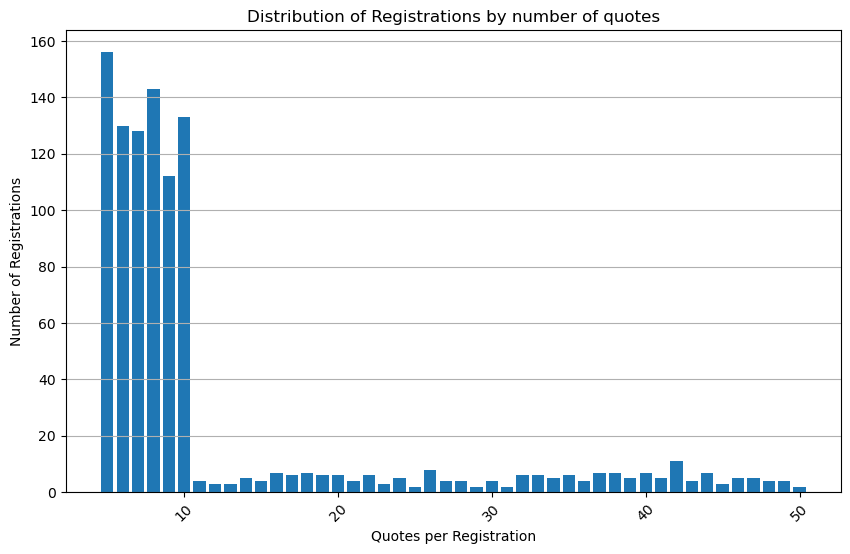

           counted
count  1000.000000
mean     12.033000
std      10.685227
min       5.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      50.000000
registration    ZZ54VFF
counted              50
dtype: object


In [38]:
#Examining the number of quotes per sale
import matplotlib.pyplot as plt

#Grouping the data by registration shows the number of quotes per sale
registration_counts = sales_quotes.groupby('registration').size().reset_index(name='counted')

#Counting the number of registrations by buckets of quotes per registration allows the data to plotted as a bar
count_distribution = registration_counts['counted'].value_counts().reset_index()
count_distribution.columns = ['quotes_per_registration', 'number_of_registrations']
count_distribution = count_distribution.sort_values('quotes_per_registration')

#Plotting the data shows the distribution
plt.figure(figsize=(10, 6))
plt.bar(count_distribution['quotes_per_registration'], count_distribution['number_of_registrations'])
plt.xlabel('Quotes per Registration')
plt.ylabel('Number of Registrations')
plt.title('Distribution of Registrations by number of quotes')
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()
                           
#This can be coupled with statistics                     
print(registration_counts.describe())

The average number of quotes per sale is 12. The graph is heavily skewed towards <=10 quotes per sale, with a long tail towards 50 quotes. Given the amount of skew, outliers can be defined by interquartile range, or Q3(10) + 1.5 * (Q3(10) - Q1(6)) = 16

In [37]:
quote_17 = registration_counts[registration_counts['counted'] >= 17]
over_quoted = sales_quotes[sales_quotes['registration'].isin(quote_17['registration'])]
print(len(quote_17))

#This subset could be viewed in greater detail to assess the validity of the quote
display(over_quoted)

172


,quote_id,registration,premium,quote_date,postcode,forename,surname,email,quote_id_quotes,premium_quotes,...,email_quotes,convictions,claims,mileage,owned_years,ncb,age,licence_years,value,occupation
7,f95f89b2-c90c-4a51-80c6-ede7f3c06938,VP30BDW,3643.48,06/12/2024,XZ1 6SS,Laura,Garcia,laura.garcia905@gmail.com,0bf3e11d-0b62-496e-8d68-5cada2d7ed3c,4226.99,...,laura.garcia905@gmail.com,1,2,10000.0,4,0,46,1,40000.0,Employed
8,f95f89b2-c90c-4a51-80c6-ede7f3c06938,VP30BDW,3643.48,06/12/2024,XZ1 6SS,Laura,Garcia,laura.garcia905@gmail.com,0db586ea-1282-4254-a53b-2c3f42e33dee,3221.54,...,laura.garcia900@gmail.com,1,2,10000.0,4,0,46,1,40000.0,Employed
9,f95f89b2-c90c-4a51-80c6-ede7f3c06938,VP30BDW,3643.48,06/12/2024,XZ1 6SS,Laura,Garcia,laura.garcia905@gmail.com,0e400dbc-5954-426e-a7f2-fed912d2ac68,2833.60,...,laura.garcia905@gmail.com,1,2,10000.0,4,0,46,1,40000.0,Employed
10,f95f89b2-c90c-4a51-80c6-ede7f3c06938,VP30BDW,3643.48,06/12/2024,XZ1 6SS,Laura,Garcia,laura.garcia905@gmail.com,2513ac4c-e182-44e2-afce-05f2ed5e401d,1110.69,...,laura.garcia905@gmail.com,1,2,10000.0,4,0,45,1,40000.0,Employed
11,f95f89b2-c90c-4a51-80c6-ede7f3c06938,VP30BDW,3643.48,06/12/2024,XZ1 6SS,Laura,Garcia,laura.garcia905@gmail.com,2c9cb0d2-acb1-4735-9f4c-6d8d184a73ae,3183.14,...,laura.garcia905@gmail.com,1,2,9936.0,4,0,46,1,39956.0,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12014,18fc6b72-8beb-4a66-8c0b-3501510747aa,TK27JGK,417.43,14/12/2024,XM4 1LP,Charles,Walker,charles.walker706@gmail.com,e0075a3c-2ddd-4cbb-b312-83845978e5fd,3756.84,...,sabrina.vasquez505@gmail.com,0,0,19820.0,10,0,31,8,14003.0,Employed
12015,18fc6b72-8beb-4a66-8c0b-3501510747aa,TK27JGK,417.43,14/12/2024,XM4 1LP,Charles,Walker,charles.walker706@gmail.com,e5e3b572-25d0-4e50-a1ca-83cf84fc5d4a,2099.92,...,charles.walker706@gmail.com,0,0,20000.0,10,0,31,8,15000.0,Employed
12016,18fc6b72-8beb-4a66-8c0b-3501510747aa,TK27JGK,417.43,14/12/2024,XM4 1LP,Charles,Walker,charles.walker706@gmail.com,eb2329dd-d4ea-4557-9226-29a57d92c263,1426.20,...,charles.walker706@gmail.com,0,0,20000.0,10,0,31,8,14500.0,Unemployed
12017,18fc6b72-8beb-4a66-8c0b-3501510747aa,TK27JGK,417.43,14/12/2024,XM4 1LP,Charles,Walker,charles.walker706@gmail.com,f2ffc5be-0cc1-4c66-887c-7e41364bc728,2826.32,...,charles.walker706@gmail.com,0,0,20000.0,10,0,31,8,15000.0,Retired


This is subset is almost half of the quotes but only 17% of the sales. A better definition for outlier may be used to filter down better. From this point other methods of investigation could be used, such as checking if the sales premium is much lower than the corresponding group of quotes mean premium. Additionally, changes in data between quotes could be checked for groups of quotes.

In [56]:
#For example, looking at the registration with the most quotes
max_quote = registration_counts.sort_values('counted',ascending=False).iloc[0]['registration']
quote_selection = sales_quotes[sales_quotes['registration']==max_quote]

display(quote_selection)
print(quote_selection.describe())


,quote_id,registration,premium,quote_date,postcode,forename,surname,email,quote_id_quotes,premium_quotes,...,email_quotes,convictions,claims,mileage,owned_years,ncb,age,licence_years,value,occupation
11507,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,02d9354f-e81b-4858-8258-2faa134fc925,2838.57,...,joshua.castro990@gmail.com,0,0,4000.0,20,2,46,21,47000.0,Unemployed
11508,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,0415f601-ec5b-4493-8a77-e173d4bcc0b7,3203.61,...,joshua.maldonado338@gmail.com,0,0,4047.0,19,2,46,21,47000.0,Student
11509,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,0d7fbea5-fa0e-42a0-b42a-2bffb15e1832,3487.90,...,joshua.maldonado146@gmail.com,0,0,4000.0,19,2,46,21,47000.0,Unemployed
11510,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,14b8d76c-ca26-45bd-a31e-3808da9edf86,1448.43,...,joshua.maldonado338@gmail.com,0,0,4000.0,19,2,45,21,47000.0,Unemployed
11511,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,19900944-bb61-4fbc-b69b-df90d2f0ad30,3311.42,...,joshua.maldonado338@gmail.com,1,0,4000.0,19,2,46,21,46717.0,Retired
11512,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,25b3d3e2-4613-4082-af1c-927b754c39b9,4277.82,...,jo.maldonado320@gmail.com,0,0,4000.0,19,2,46,21,47000.0,Unemployed
11513,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,2a25622d-e8b1-49a5-b5ef-1c817240d43b,2906.46,...,joshua.maldonado338@gmail.com,0,0,4014.0,19,2,46,21,47000.0,Employed
11514,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,31da849e-b42f-4a51-a9b6-ed4e9e33b475,1441.86,...,joshua.maldonado136@gmail.com,0,0,4000.0,19,2,46,21,47000.0,Unemployed
11515,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,37a586c6-11f4-45da-882a-53c313cc05d4,760.88,...,joshua.maldonado338@gmail.com,0,0,4000.0,19,2,46,21,47000.0,Unemployed
11516,a77d84ba-b5f9-4201-abfd-13d8680d6de3,SJ58NPB,955.5,16/12/2024,KK4 1HO,Joshua,Maldonado,joshua.maldonado338@gmail.com,3ea1cec7-2713-4fab-a3a0-5b59eefad8a0,4874.73,...,joshua.maldonado338@gmail.com,0,0,4000.0,19,2,46,21,47000.0,Unemployed


       premium  premium_quotes  convictions  claims      mileage  owned_years  \
count     50.0       50.000000    50.000000    50.0    50.000000    50.000000   
mean     955.5     2500.096800     0.020000     0.0  3975.480000    19.020000   
std        0.0     1458.096644     0.141421     0.0   140.504084     0.141421   
min      955.5      201.960000     0.000000     0.0  3564.000000    19.000000   
25%      955.5     1045.682500     0.000000     0.0  4000.000000    19.000000   
50%      955.5     2508.810000     0.000000     0.0  4000.000000    19.000000   
75%      955.5     3585.325000     0.000000     0.0  4000.000000    19.000000   
max      955.5     4894.920000     1.000000     0.0  4456.000000    20.000000   

        ncb        age  licence_years         value  
count  50.0  50.000000           50.0     50.000000  
mean    2.0  46.000000           21.0  47051.940000  
std     0.0   1.873554            0.0    501.573297  
min     2.0  38.000000           21.0  46111.000000  


There is some change in column values between quotes. The premium used in the sale is over one standard deviation below the mean.

In [66]:
#To check mileage on claims an mean mileage per year should be created. I add 1 as the year can be rounded up
sales_quotes['miles_per_year'] = sales_quotes['mileage']/(sales_quotes['owned_years']+1)


#To prevent the average being weighted by sales with more quotes, I will average the value per registration
avg_miles_reg = sales_quotes.groupby('registration')['miles_per_year'].mean().reset_index()
print(avg_miles_reg)
mean_miles = avg_miles_reg['miles_per_year'].mean()
standard_dev = avg_miles_reg['miles_per_year'].std()
median_miles = avg_miles_reg['miles_per_year'].median()
print(median_miles,mean_miles,standard_dev)

#Adding the median miles per year allows another dimension to view the data
sales_quotes['med_miles_per_year'] = median_miles

#The dataset can be filtered by miles per year and investigated further
sales_quotes_low_miles = sales_quotes[sales_quotes['miles_per_year'] < 150]
display(sales_quotes_low_miles)

    registration  miles_per_year
0        AA84OXW     2724.971429
1        AB21QEV      769.230769
2        AB22HXY     1458.595960
3        AE26MCE     2139.122449
4        AE44NHP      825.033333
..           ...             ...
995      ZU18RFB      509.951020
996      ZW55EQF     1363.666667
997      ZX65VNS       67.927365
998      ZY19MHM      452.145455
999      ZZ54VFF     4978.166667

[1000 rows x 2 columns]
940.49921875 1673.7061140475053 2355.6467233615067


,quote_id,registration,premium,quote_date,postcode,forename,surname,email,quote_id_quotes,premium_quotes,...,claims,mileage,owned_years,ncb,age,licence_years,value,occupation,miles_per_year,med_miles_per_year
37,6eeeaf9d-b1e2-4439-861c-f5a773de66db,NQ35KZQ,1717.61,30/12/2024,US9 3VY,Joshua,Williams,joshua.williams516@gmail.com,729d601a-0514-45f8-9d06-762c423aa72e,3309.91,...,0,2607.0,18,7,69,11,16754.0,Student,137.210526,940.499219
38,6eeeaf9d-b1e2-4439-861c-f5a773de66db,NQ35KZQ,1717.61,30/12/2024,US9 3VY,Joshua,Williams,joshua.williams516@gmail.com,736559c3-2cf5-48f7-83ed-735f6990862e,1158.52,...,0,2615.0,18,7,68,11,22000.0,Student,137.631579,940.499219
96,e1470977-7a90-4eb1-9024-eb9441f48ecd,MO95VLP,3274.73,27/12/2024,BG4 7RQ,Daniel,Cain,daniel.cain821@gmail.com,3bb69eb3-121b-45bb-ba84-f59d00fc317f,4846.03,...,0,2249.0,16,2,32,9,3994.0,Student,132.294118,940.499219
97,e1470977-7a90-4eb1-9024-eb9441f48ecd,MO95VLP,3274.73,27/12/2024,BG4 7RQ,Daniel,Cain,daniel.cain821@gmail.com,40dbf189-7b14-420f-abc4-6c2a8071973c,3903.54,...,0,2326.0,16,2,32,9,3000.0,Employed,136.823529,940.499219
98,e1470977-7a90-4eb1-9024-eb9441f48ecd,MO95VLP,3274.73,27/12/2024,BG4 7RQ,Daniel,Cain,daniel.cain821@gmail.com,5cebea89-b72e-4398-a4d5-a0b8d92c1e79,3298.87,...,0,2000.0,16,2,32,9,3000.0,Student,117.647059,940.499219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12028,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,63191f3d-2bec-4c6a-96ac-b674445f462d,3248.12,...,1,1000.0,12,1,41,19,49000.0,Retired,76.923077,940.499219
12029,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,80ce48a1-f8cd-454f-b63c-38d7b28466d3,1923.59,...,1,1000.0,12,1,41,19,49000.0,Unemployed,76.923077,940.499219
12030,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,baa5e402-45be-4431-b5b1-c21bb04fce6b,2795.73,...,1,1000.0,12,1,40,19,49000.0,Unemployed,76.923077,940.499219
12031,80ce48a1-f8cd-454f-b63c-38d7b28466d3,KZ20ALT,1923.59,10/12/2024,XD5 8SS,George,Mcguire,george.mcguire680@gmail.com,cf8534bd-8592-4d52-92b2-4f15612d2460,4146.25,...,1,1000.0,12,1,41,19,49000.0,Employed,76.923077,940.499219


Similar methods can be  done for value and also analysis done on premium to filter by outliers. Once the dataset is filtered, further investigation can be done using the additional data such as claims and convictions and occupation.

# Conclusions
From the analysis I conducted it appears that most people submit 10 or fewer quotes before obtaining insurance, however 1/10 people submit 3 times as many, indicating trying to minimise their premium. Additionally, mileage varies by a great deal and very low mileage per year could be an indicator of misrepresentation. Data that doesn't make sense could also be an indicator of misrepresentation, as many quotes have ages that are too young compared to the time they have owned a licence or the vehicle. The same is true for ncb more than the licence years. While the dataset has a lot of data, a greater understanding of the data would go a long way in determining what is the best way to filter the data. 

# Going forwards
With more time to spend on this project I would first gain a better understanding of the data, I would then determine what views to use to analyse the data, which columns are best to filter by and perform statistical analysis on and look for patterns. As such I mainly stuck to examples of the approaches I would take and did not fully clean each column. I would also check the assumption that only one registration exists per defined insuree more rigourously using matched emails and user data.

## Questions
- There are a lot of results where the user age doesn't make sense with the other data. From user age and licence years being impossible to the same for ncb or owned years. Am I misunderstanding the data or are these all data accidentally or intentionally misrepresented?
- Many results have identical choices but different premiums. Is this data just a subset of the captured data for quotes? An example is Kylie Brady:HY26UYI
- I don't quite understand why there are so many quotes for people with the same data. Is this to do with the quote process?


In [74]:
brady = sales_quotes[sales_quotes['registration']=='HY26UYI']
columns_to_drop = ['quote_id','registration','quote_date','postcode','forename','surname','email']
brady_copy = brady.copy().drop(columns=columns_to_drop,axis=1)
display(brady_copy)

,premium,quote_id_quotes,premium_quotes,quote_date_quotes,postcode_quotes,forename_quotes,surname_quotes,email_quotes,convictions,claims,mileage,owned_years,ncb,age,licence_years,value,occupation,miles_per_year,med_miles_per_year
3249,200.56,0ad0c0d9-fae0-429f-b6dc-e46a81528f1a,1653.97,09/12/2024,PI6 0XM,Kylie,Davis,kylie.davis237@gmail.com,1,0,16623.0,3,5,54,14,42000.0,Student,4155.75,940.499219
3250,200.56,104cd5d5-4358-4bdd-9444-3dbf119d1545,2908.05,09/12/2024,BU4 5ZF,Wayne,Gutierrez,kylie.brady197@gmail.com,1,0,16926.0,3,5,54,14,42000.0,Retired,4231.50,940.499219
3251,200.56,7aedb098-5bde-4ee7-98db-16d96685cc06,3814.65,09/12/2024,BU4 5ZF,Kylie,Garrett,kylie.brady197@gmail.com,1,0,17127.0,3,5,54,14,42000.0,Retired,4281.75,940.499219
3252,200.56,7e7fc776-ba77-4631-b5b6-d0f5d5b81218,2460.16,09/12/2024,BU4 5ZF,Kylie,Brady,kylie.brady727@gmail.com,1,0,17000.0,3,5,54,14,42000.0,Retired,4250.00,940.499219
3253,200.56,b94a1a58-18d4-404e-96c2-b2cd541aafde,4464.77,09/12/2024,VW7 9DP,Kylie,Brady,kylie.brady883@gmail.com,1,0,17000.0,3,5,54,14,42000.0,Retired,4250.00,940.499219
3254,200.56,c697219d-886f-4fe7-b60c-e4ca8e21937b,200.56,09/12/2024,BU4 5ZF,Kylie,Brady,kylie.brady197@gmail.com,1,0,17000.0,3,5,54,14,42000.0,Retired,4250.00,940.499219
